In [13]:
import json
import statsmodels.api as sm
from scipy.stats import norm, kstest
import pylab
import numpy as np

NLU_NAMES = ['watson', 'luis', 'snips', 'rasa-sklearn', 'rasa-diet']
VERSION = '8'
NUM_SPLITS = 10

def load_json(path):
    with open(path) as json_file:
        data = json.load(json_file)
    return data

def get_nlu_result_file(nlu, version, split_num):
    nlu_result_file = '../results/' + nlu + '/v' + str(version) + '/' + nlu + '_split_' + str(split_num) + '_results_v' + str(version) + '.json'
    return nlu_result_file

def remove_empty_preds(data):
    new_data = []
    for test in data:
        if test['text'] != '':
            new_data.append(test)
    return new_data

# Confidence estimates

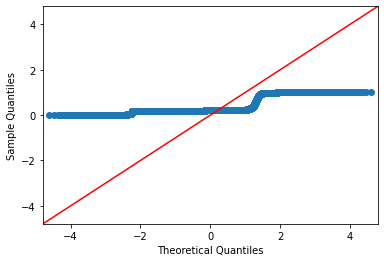

watson 0.5665494702578215 0.0


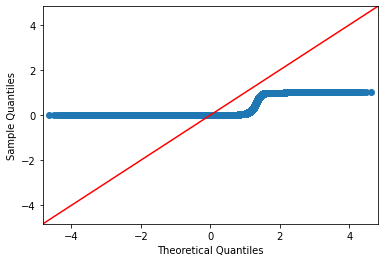

luis 0.5000000000011403 0.0


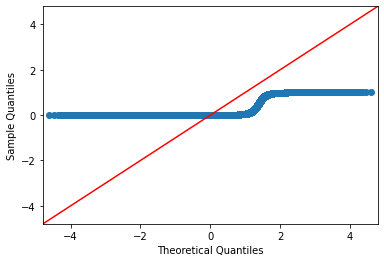

snips 0.5000002655605398 0.0


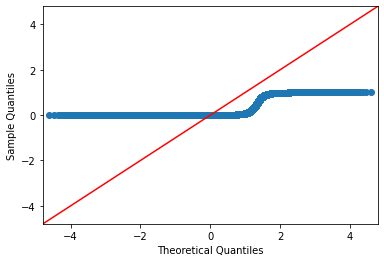

rasa-sklearn 0.5000000000000043 0.0


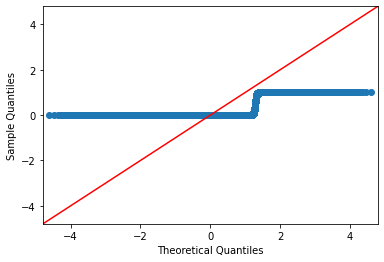

rasa-diet 0.5 0.0


In [15]:
def get_confidence_estatimates(nlu, split_num):
    nlu_result_file = get_nlu_result_file(nlu, VERSION, split_num)
    data = remove_empty_preds(load_json(nlu_result_file))
    return [
        intent_ranking['confidence']
        for test in data
        for intent_ranking in test['intent_ranking']]
                
for nlu in NLU_NAMES:
    scores = [
        score
        for split_num in range(1, NUM_SPLITS+1)
        for score in get_confidence_estatimates(nlu, split_num)]
    sm.qqplot(np.array(scores), line='45')
    pylab.show()
    ks_statistic, p_value = kstest(scores, 'norm')
    print(nlu, ks_statistic, p_value)    

# Instance-level accuracies

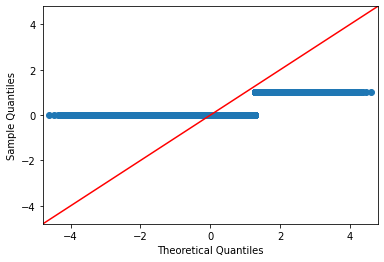

watson 0.5 0.0


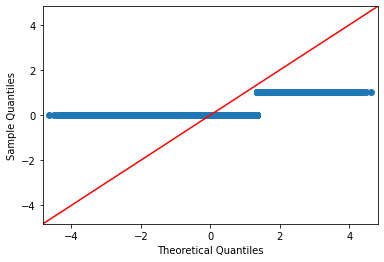

luis 0.5 0.0


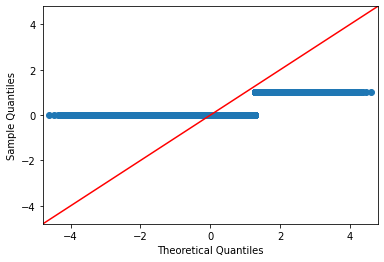

snips 0.5 0.0


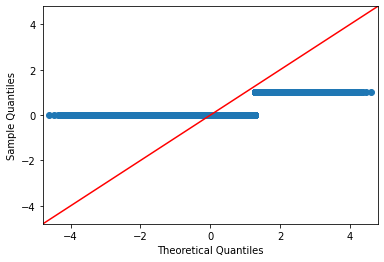

rasa-sklearn 0.5 0.0


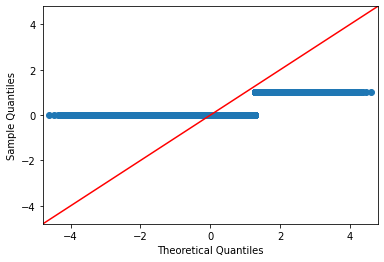

rasa-diet 0.5 0.0


In [16]:
def get_accuracies(nlu, split_num):
    nlu_result_file = get_nlu_result_file(nlu, VERSION, split_num)
    data = remove_empty_preds(load_json(nlu_result_file))
    return [
        intent_ranking['name'] == test['correct_intent']
        for test in data
        for intent_ranking in test['intent_ranking']]
                
for nlu in NLU_NAMES:
    accuracies = [
        accuracy
        for split_num in range(1, NUM_SPLITS+1)
        for accuracy in get_accuracies(nlu, split_num)]
    sm.qqplot(np.array(accuracies), line='45')
    pylab.show()
    ks_statistic, p_value = kstest(accuracies, 'norm')
    print(nlu, ks_statistic, p_value)        